### Load digits dataset form sklearn

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn import datasets
digits = datasets.load_digits()
# The dataset contains 1797 images representing handwritten digits, 
# together with numerical labels representing the true number associated with each image. 
# Two arrays: digits.images and digits.targe

In [54]:
# Each element in the array digits.images is on its own a 8 by 8 array of pixels, 
# where each pixel is an integer between 0 and 16.
# print(digits.data[000])
print(digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


plt.figure()
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

In [56]:
print(digits.target[0])

0


In [72]:
# Create a training set with just the first 10 digits
# A subset of the database, take 10 images
# Each point in this 64-dimensional space represents an image of a digit.
X_train = digits.data[0:10]
Y_train = digits.target[0:10]

In [71]:
# Choose a test image / a random number in the remaining part of the dataset
X_test = digits.data[345]

<IPython.core.display.Javascript object>


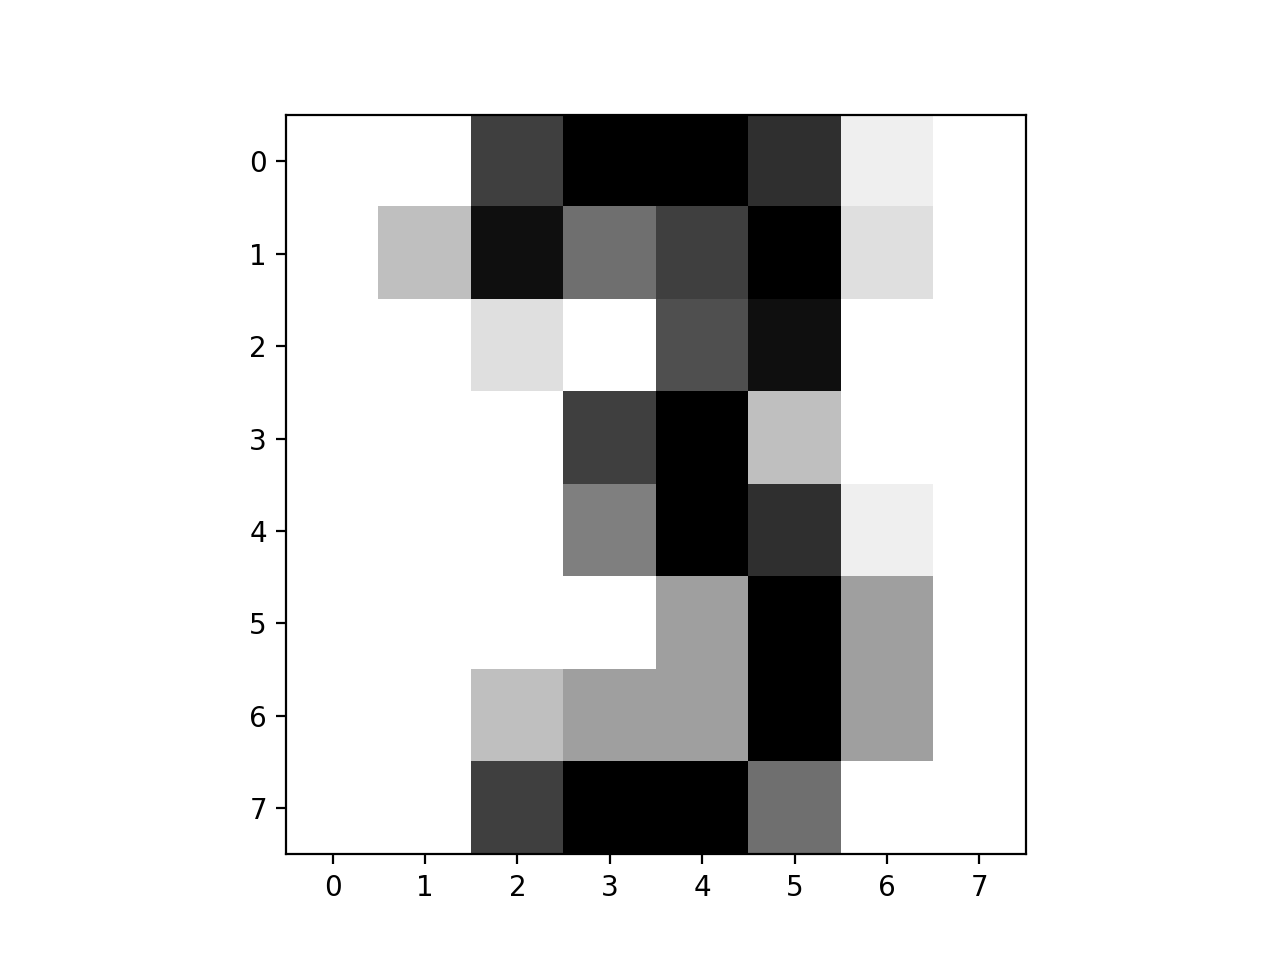

In [66]:
plt.figure()
plt.imshow(digits.images[345], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

In [67]:
def dist(x, y):
    return np.sqrt(np.sum((x - y)**2)) # np.sqrt and np.sum are numpy functions to work with numpy arrays


### Run the Nearest Neighbor Classifier

In [68]:
num = len(X_train) # Compute the number of points in X_train
distance = np.zeros(num) # Initialize an arrays of zeros
for i in range(num):
    distance[i] = dist(X_train[i], X_test) # Compute distance from X_train[i] to X_test
min_index = np.argmin(distance) # Get the index with smallest distance
print(distance)
print(Y_train[min_index])

[ 48.3011387   48.45616576  52.20153254  32.          59.53990259
  36.4280112   56.25833272  50.36864104  38.28837944  43.97726685]
3


In [69]:
# Make sure that the answer is correct
print(digits.target[min_index])

3


In [70]:
# Test how well we are doing with 100 test images
# Count how many mistakes the algorithm we just implemented get
num = len(X_train) # Get the length of our training data
no_errors = 0 # Keep track of the number of errors
distance = np.zeros(num) # Create an array the length of X_trains, filled with zeros

for j in range(1697, 1797):
    X_test = digits.data[j] # Test values in the range [1697, 1797)
    for i in range(num):
        distance[i] = dist(X_train[i], X_test) # Compute distance from X_train[i] to X_test
    min_index = np.argmin(distance) # Get the index of the minimum distance
    
    if Y_train[min_index] != digits.target[j]: # If the actual label is not the same as the nearest neighbor, add a count to the number of errors
        no_errors += 1
        
print(no_errors)

37


### Improving the performance

In [73]:
# Enlarge training data from 10 to 1000 images
X_train = digits.data[0:1000]
Y_train = digits.target[0:1000]

In [74]:
# Number of mistakes done in testing 100 images
num = len(X_train) # Get the length of our training data
no_errors = 0 # Keep track of the number of errors
distance = np.zeros(num) # Create an array the length of X_trains, filled with zeros

for j in range(1697, 1797):
    X_test = digits.data[j] # Test values in the range [1697, 1797)
    for i in range(num):
        distance[i] = dist(X_train[i], X_test) # Compute distance from X_train[i] to X_test
    min_index = np.argmin(distance) # Get the index of the minimum distance
    
    if Y_train[min_index] != digits.target[j]: # If the actual label is not the same as the nearest neighbor, add a count to the number of errors
        no_errors += 1
        
print(no_errors)

3
